In [7]:
import csv
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
set48_list_file = "/content/drive/My Drive/datasciences/set48.txt"
set48_list = []
with open(set48_list_file,"r",newline = "") as fp:
	reader = csv.reader(fp)
	for line in reader:
		set48_list.append(line[0])
print(set48_list)

['ADVANC', 'AOT', 'BBL', 'BDMS', 'BEM', 'BGRIM', 'BH', 'BJC', 'BPP', 'BTS', 'CBG', 'CPALL', 'CPF', 'CPN', 'DTAC', 'EA', 'EGCO', 'GLOBAL', 'GPSC', 'GULF', 'HMPRO', 'INTUCH', 'IRPC', 'IVL', 'KBANK', 'KTB', 'KTC', 'LH', 'MINT', 'MTC', 'OSP', 'PTT', 'PTTEP', 'PTTGC', 'RATCH', 'SAWAD', 'SCB', 'SCC', 'TCAP', 'TISCO', 'TMB', 'TOA', 'TOP', 'TRUE', 'TTW', 'TU', 'VGI', 'WHA']


In [8]:
stock_info = dict() #create Dictionary
for stock in set48_list:
	print(f"Working with {stock}")
	try:
		df = data.DataReader(stock+".BK","yahoo","2020-01-01","2020-09-15")
#load data frame from Yahoo finance. "".BK"to indicate from SET
		close_price = df['Adj Close'].dropna() # drop out invalid data
		close_price = close_price.values # look at the value only
		stock_info[stock] = close_price # assing to dictionary
	except:
		print("Date is out of range!!")

Working with ADVANC
Working with AOT
Working with BBL
Working with BDMS
Working with BEM
Working with BGRIM
Working with BH
Working with BJC
Working with BPP
Working with BTS
Working with CBG
Working with CPALL
Working with CPF
Working with CPN
Working with DTAC
Working with EA
Working with EGCO
Working with GLOBAL
Working with GPSC
Working with GULF
Working with HMPRO
Working with INTUCH
Working with IRPC
Working with IVL
Working with KBANK
Working with KTB
Working with KTC
Working with LH
Working with MINT
Working with MTC
Working with OSP
Working with PTT
Working with PTTEP
Working with PTTGC
Working with RATCH
Working with SAWAD
Working with SCB
Working with SCC
Working with TCAP
Working with TISCO
Working with TMB
Working with TOA
Working with TOP
Working with TRUE
Working with TTW
Working with TU
Working with VGI
Working with WHA


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.DataFrame(stock_info) # convert dictionary to dataframe
ret = df.pct_change(1) #diary return
ret  = ret.dropna() #Drop NA out
print(ret.head()) 

     ADVANC       AOT       BBL  ...        TU       VGI       WHA
1 -0.009174 -0.016611 -0.018349  ...  0.022059 -0.010152 -0.010256
2  0.004630 -0.023649 -0.028037  ... -0.050360 -0.025641 -0.036269
3  0.027650  0.020761  0.003205  ...  0.022727  0.000000  0.010753
4 -0.013453 -0.010169 -0.022364  ... -0.014815 -0.005263 -0.069149
5 -0.009091  0.017123  0.009804  ...  0.045113  0.005291  0.011429

[5 rows x 48 columns]


In [10]:
print((ret.mean()).sort_values(ascending=False).head(5)*250)

CBG       0.661579
GLOBAL    0.452777
CPF       0.297344
TU        0.201426
OSP       0.112656
dtype: float64


In [11]:
import math
print((ret.std()).sort_values(ascending=True).head(5)*math.sqrt(250))

CPALL     0.264293
ADVANC    0.277677
TTW       0.277997
INTUCH    0.323149
BDMS      0.380032
dtype: float64


In [12]:
retcv = ret.std() / ret.mean()
print(retcv.sort_values(ascending=True).head(5))

TOA     -501.062145
KTC     -308.781380
BGRIM   -211.229565
MTC     -208.621449
SCC     -100.224819
dtype: float64


Text(0.5, 1.0, 'TOA')

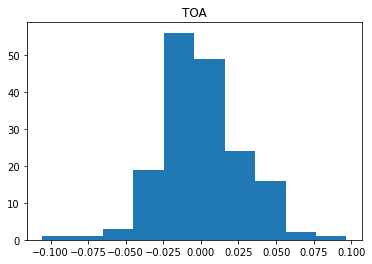

In [13]:
import matplotlib.pyplot as plt
plt.hist(ret.TOA)
plt.title("TOA")

Text(0.5, 1.0, 'KTC')

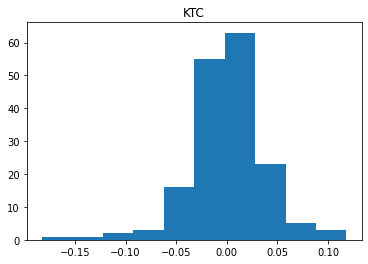

In [ ]:
plt.hist(ret.KTC)
plt.title("KTC")

Text(0.5, 1.0, 'BGRIM')

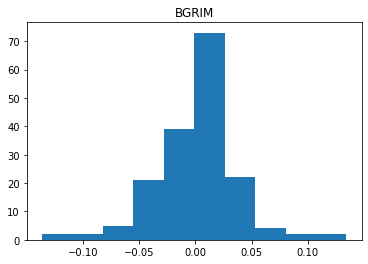

In [ ]:
plt.hist(ret.BGRIM)
plt.title("BGRIM")

Text(0.5, 1.0, 'MTC')

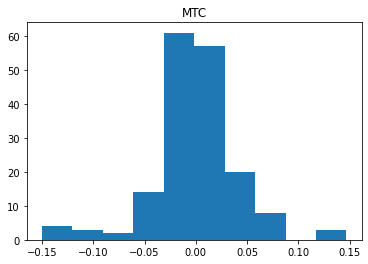

In [ ]:
plt.hist(ret.MTC)
plt.title("MTC")

Text(0.5, 1.0, 'SCC')

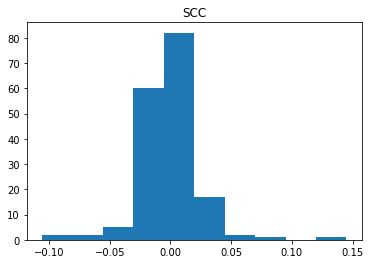

In [14]:
plt.hist(ret.SCC)
plt.title("SCC")

In [39]:
pd.set_option('display.max_columns', None)

print(df.GULF)
print(df.CPN)

#print(retcorr.sort_values(ascending=True).head(1))

0      168.747421
1      170.245178
2      170.245178
3      173.240692
4      168.248169
          ...    
168     31.750000
169     31.500000
170     31.250000
171     31.750000
172     31.750000
Name: GULF, Length: 173, dtype: float64
0      59.158455
1      59.396999
2      58.442829
3      58.204288
4      57.011574
         ...    
168    46.750000
169    45.250000
170    44.500000
171    43.750000
172    43.500000
Name: CPN, Length: 173, dtype: float64


In [ ]:
print((500000/168.747421) * 31.750000)